# Implenting an Array API to use with Scikit-learn

In this tutorial, we will create an object that implements the Array API and use it in the `LinearDiscriminantAnalysis` example that is in the [scikit-learn docs](https://scikit-learn.org/stable/modules/array_api.html).


First, let's try LDA with normal numpy arrays.

We take a set of input vector and reduce the dimensionality to 1.


In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import config_context

iris = datasets.load_iris()

X = iris.data
y = iris.target


def fit(X, y):
    with config_context(array_api_dispatch=True):
        lda = LinearDiscriminantAnalysis(n_components=2)
        X_r2 = lda.fit(X, y).transform(X)
        return X_r2

    target_names = iris.target_names
    plt.figure()
    colors = ["navy", "turquoise", "darkorange"]

    plt.figure()
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name)
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.title("LDA of IRIS dataset")

    plt.show()


fit(X, y)

array([[ 8.06179978e+00, -3.00420621e-01],
       [ 7.12868772e+00,  7.86660426e-01],
       [ 7.48982797e+00,  2.65384488e-01],
       [ 6.81320057e+00,  6.70631068e-01],
       [ 8.13230933e+00, -5.14462530e-01],
       [ 7.70194674e+00, -1.46172097e+00],
       [ 7.21261762e+00, -3.55836209e-01],
       [ 7.60529355e+00,  1.16338380e-02],
       [ 6.56055159e+00,  1.01516362e+00],
       [ 7.34305989e+00,  9.47319209e-01],
       [ 8.39738652e+00, -6.47363392e-01],
       [ 7.21929685e+00,  1.09646389e-01],
       [ 7.32679599e+00,  1.07298943e+00],
       [ 7.57247066e+00,  8.05464137e-01],
       [ 9.84984300e+00, -1.58593698e+00],
       [ 9.15823890e+00, -2.73759647e+00],
       [ 8.58243141e+00, -1.83448945e+00],
       [ 7.78075375e+00, -5.84339407e-01],
       [ 8.07835876e+00, -9.68580703e-01],
       [ 8.02097451e+00, -1.14050366e+00],
       [ 7.49680227e+00,  1.88377220e-01],
       [ 7.58648117e+00, -1.20797032e+00],
       [ 8.68104293e+00, -8.77590154e-01],
       [ 6.

In [2]:
# import torch

# fit(torch.asarray(X), torch.asarray(y))

Now let's try to make a NDArray object that implements the Array API.


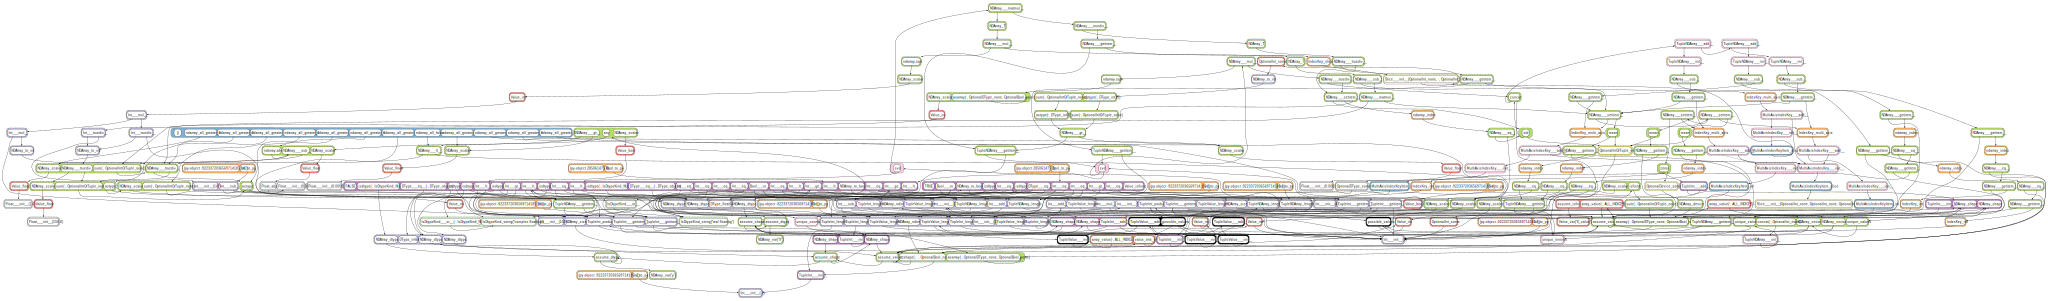

In [3]:
from egglog.exp.array_api import *


X_arr = NDArray.var("X")
assume_dtype(X_arr, float64)
assume_shape(X_arr, TupleInt(150) + TupleInt(4))

# We don't know X, but we assume it is finite
X_value = Value.var("X_value")
assume_isfinite(X_value)
assume_value(X_arr, X_value)

y_arr = NDArray.var("y")
assume_dtype(y_arr, int64)
assume_shape(y_arr, TupleInt(150))
assume_value(y_arr, value_one_of((0, 1, 2)))

# Add values for the constants
# egraph.register(
#     # rewrite(isfinite(sum(X_arr)).to_bool(), runtime_ruleset).to(TRUE),
#     # rewrite(isfinite(sum(y_arr)).to_bool(), runtime_ruleset).to(TRUE),
#     rewrite(unique_values(y_arr).shape, runtime_ruleset).to(TupleInt(Int(3))),
#     rewrite(unique_values(y_arr).size, runtime_ruleset).to(Int(3)),
# )

with egraph:
    res = fit(X_arr, y_arr)
    egraph.display()

In [5]:
@egraph.register
def _optimizations(i: Int):
    yield rewrite(sqrt(NDArray.scalar(Value.int(Int(0))))).to(NDArray.scalar(Value.int(Int(0))))
    yield rewrite(i * Int(0)).to(Int(0))

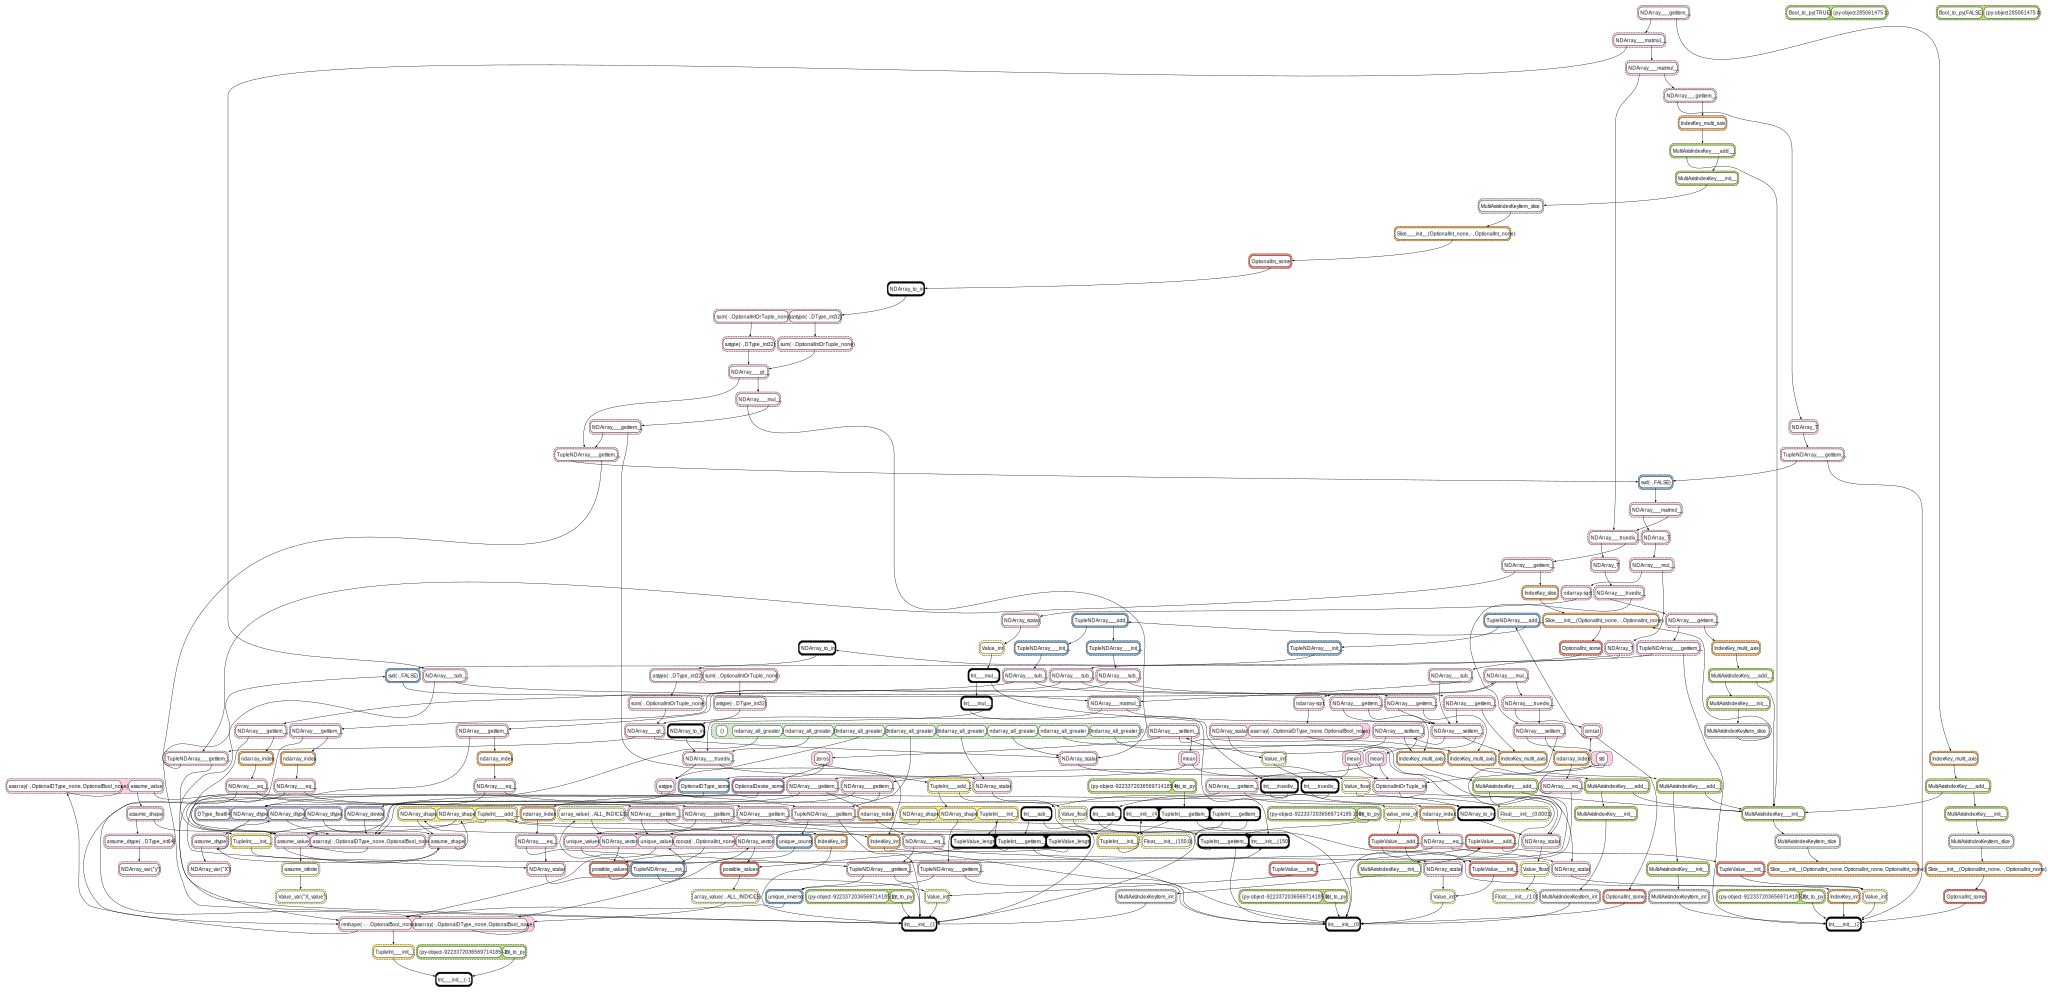

_NDArray_1 = NDArray.var("X")
assume_dtype(_NDArray_1, DType.float64)
assume_shape(_NDArray_1, TupleInt(Int(150)) + TupleInt(Int(4)))
_Value_1 = Value.var("X_value")
assume_isfinite(_Value_1)
assume_value(_NDArray_1, _Value_1)
_NDArray_2 = NDArray.var("y")
assume_dtype(_NDArray_2, DType.int64)
assume_shape(_NDArray_2, TupleInt(Int(150)))
assume_value(_NDArray_2, value_one_of(TupleValue(Value.int(Int(0))) + (TupleValue(Value.int(Int(1))) + TupleValue(Value.int(Int(2))))))
_NDArray_3 = reshape(_NDArray_2, TupleInt(Int(-1)))
_NDArray_4 = astype(unique_counts(_NDArray_3)[Int(1)], DType.float64) / NDArray.scalar(Value.float(Float(150.0)))
_NDArray_5 = zeros(unique_values(_NDArray_3).shape + TupleInt(Int(4)), OptionalDType.some(DType.float64), OptionalDevice.some(_NDArray_1.device))
_MultiAxisIndexKey_1 = MultiAxisIndexKey(MultiAxisIndexKeyItem.slice(Slice()))
_IndexKey_1 = IndexKey.multi_axis(MultiAxisIndexKey(MultiAxisIndexKeyItem.int(Int(0))) + _MultiAxisIndexKey_1)
_NDArray_5[_IndexKey_1] = mean(_NDArray_1[ndarray_index(unique_inverse(_NDArray_3)[Int(1)] == NDArray.scalar(Value.int(Int(0))))], OptionalIntOrTuple.int(Int(0)))
_IndexKey_2 = IndexKey.multi_axis(MultiAxisIndexKey(MultiAxisIndexKeyItem.int(Int(1))) + _MultiAxisIndexKey_1)
_NDArray_5[_IndexKey_2] = mean(_NDArray_1[ndarray_index(unique_inverse(_NDArray_3)[Int(1)] == NDArray.scalar(Value.int(Int(1))))], OptionalIntOrTuple.int(Int(0)))
_IndexKey_3 = IndexKey.multi_axis(MultiAxisIndexKey(MultiAxisIndexKeyItem.int(Int(2))) + _MultiAxisIndexKey_1)
_NDArray_5[_IndexKey_3] = mean(_NDArray_1[ndarray_index(unique_inverse(_NDArray_3)[Int(1)] == NDArray.scalar(Value.int(Int(2))))], OptionalIntOrTuple.int(Int(0)))
_NDArray_6 = concat(
    TupleNDArray(_NDArray_1[ndarray_index(_NDArray_3 == unique_values(_NDArray_3)[IndexKey.int(Int(0))])] - _NDArray_5[_IndexKey_1])
    + (
        TupleNDArray(_NDArray_1[ndarray_index(_NDArray_3 == unique_values(_NDArray_3)[IndexKey.int(Int(1))])] - _NDArray_5[_IndexKey_2])
        + TupleNDArray(_NDArray_1[ndarray_index(_NDArray_3 == unique_values(_NDArray_3)[IndexKey.int(Int(2))])] - _NDArray_5[_IndexKey_3])
    ),
    OptionalInt.some(Int(0)),
)
_NDArray_7 = std(_NDArray_6, OptionalIntOrTuple.int(Int(0)))
_NDArray_7[ndarray_index(std(_NDArray_6, OptionalIntOrTuple.int(Int(0))) == NDArray.scalar(Value.int(Int(0))))] = NDArray.scalar(Value.float(Float(1.0)))
_TupleNDArray_1 = svd(
    sqrt(NDArray.scalar(Value.int(NDArray.scalar(Value.float(Float(1.0))).to_int() / (Int(150) - possible_values(array_value(_NDArray_3, ALL_INDICES)).length()))))
    * (_NDArray_6 / _NDArray_7),
    FALSE,
)
_Slice_1 = Slice(OptionalInt.none, OptionalInt.some(astype(sum(_TupleNDArray_1[Int(1)] > NDArray.scalar(Value.float(Float(0.0001)))), DType.int32).to_int()))
_NDArray_8 = (_TupleNDArray_1[Int(2)][IndexKey.multi_axis(MultiAxisIndexKey(MultiAxisIndexKeyItem.slice(_Slice_1)) + _MultiAxisIndexKey_1)] / _NDArray_7).T / _TupleNDArray_1[
    Int(1)
][IndexKey.slice(_Slice_1)]
_TupleNDArray_2 = svd(
    (
        sqrt(
            NDArray.scalar(
                Value.int(
                    (Int(150) * _NDArray_4.to_int())
                    * (NDArray.scalar(Value.float(Float(1.0))).to_int() / (possible_values(array_value(_NDArray_3, ALL_INDICES)).length() - Int(1)))
                )
            )
        )
        * (_NDArray_5 - (_NDArray_4 @ _NDArray_5)).T
    ).T
    @ _NDArray_8,
    FALSE,
)
(
    (_NDArray_1 - (_NDArray_4 @ _NDArray_5))
    @ (
        _NDArray_8
        @ _TupleNDArray_2[Int(2)].T[
            IndexKey.multi_axis(
                _MultiAxisIndexKey_1
                + MultiAxisIndexKey(
                    MultiAxisIndexKeyItem.slice(
                        Slice(
                            OptionalInt.none,
                            OptionalInt.some(
                                astype(
                                    sum(_TupleNDArray_2[Int(1)] > (NDArray.scalar(Value.float(Float(0.0001))) * _TupleNDArray_2[Int(1)][IndexKey.int(I

In [6]:
with egraph:
    egraph.register(res)
    egraph.run((run(runtime_ruleset) * 10 + run() * 10).saturate())
    egraph.run((run(runtime_ruleset) * 10 + run() * 10).saturate())
    res = egraph.extract(expr=res)
    egraph.display()
res